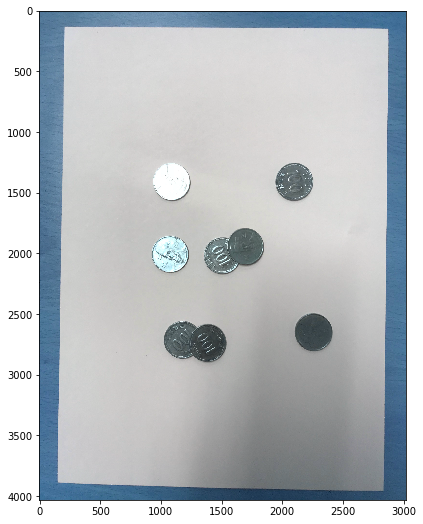

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

im = cv2.imread("images/IMG_02.JPG")
plt.imshow(im)

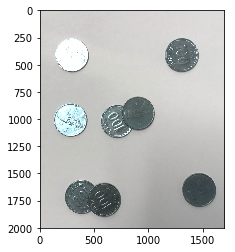

In [2]:
roi = im[1000:3000,800:2500]
plt.imshow(roi,"gray")

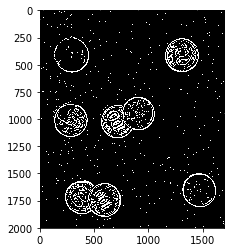

In [3]:
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (25, 25), 0)
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 13, 1)
plt.imshow(thresh,"gray")

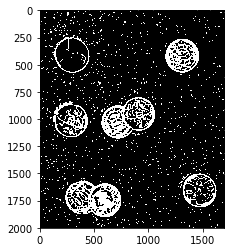

In [4]:
kernel = np.ones((4, 4), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE,kernel, iterations=3)
plt.imshow(closing,"gray")

In [5]:
cont_img = closing.copy()
contours, hierarchy = cv2.findContours(cont_img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

circles = cv2.HoughCircles(closing, cv2.HOUGH_GRADIENT, 0.1, 120, param1 = 70, param2 = 30, minRadius = 100, maxRadius = 180)
circles_rnd = np.uint16(np.around(circles))

print(circles_rnd.shape)

(1, 8, 3)


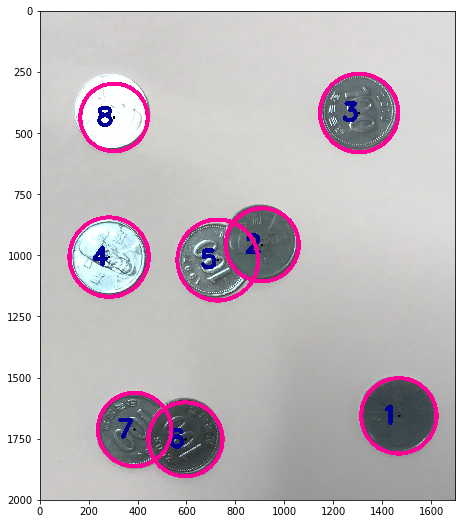

In [6]:
count = 1
for i in circles_rnd[0, :]:
    cv2.circle(roi, (i[0],i[1]),i[2],(255,0,150), 15)
    cv2.circle(roi, (i[0],i[1]),2,(0, 0, 0), 5)
    cv2.putText(roi, str(count), (i[0]-70,i[1]+30), cv2.FONT_HERSHEY_SIMPLEX, 3.3, (0,0,150), 15)
    count += 1
    
    plt.rcParams["figure.figsize"] = (16,9)
    plt.imshow(roi)